# Fake News Detection

#### Importing the required library
Here I am going to import some of the required libraries, if extra libraries are required, It will be install later on.

In [64]:
import pandas as pd
import numpy as np
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

### Get to know the Data
Inserting fake and true dataset

In [2]:
fake = pd.read_csv(r'C:\Users\owner\Fake.csv')
true = pd.read_csv(r'C:\Users\owner\True.csv')

Inserting a column called "label" for fake and true news dataset to categories fake and true news.

In [3]:
fake['label'] = 0
true['label'] = 1
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Merging the fake and true dataframe and then randomly shuffling the dataframe

In [4]:
news_df = pd.concat([fake, true], axis = 0)
news_df = news_df.sample(frac = 1)
news_df.reset_index(inplace = True)
news_df.drop(["index"], axis = 1, inplace = True)
news_df.head()

,title,text,subject,date,label
0,AS TRUMP’S POPULARITY SOARS ABROAD…Village In ...,President Donald Trump welcomed India s Prime ...,politics,"Jun 27, 2017",0
1,"Uber, Grab to tighten up on deliveries in Phil...",MANILA (Reuters) - Ride-hailing platforms Uber...,worldnews,"September 29, 2017",1
2,Arizona Secretary Of State Confirms Election ...,Monday s hearing on voter suppression and elec...,News,"March 29, 2016",0
3,GUESS WHERE THE BALTIMORE SCHOOL SYSTEM RANKS ...,Holy smokes! Could someone tell Obama he doesn...,left-news,"Apr 30, 2015",0
4,DISRESPECTFUL DEMS EXPOSED! You’ll Never Guess...,"It s a free country, and the nineteen (and cou...",politics,"Jan 16, 2017",0


Checking for missing data

In [5]:
print(news_df.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


To simplify things, Only two features ('text', 'label') will be needed for the model prediction, so we drop others.

In [6]:
news_df.drop(["title", "subject", "date"], axis=1, inplace=True)
news_df.head()

,text,label
0,President Donald Trump welcomed India s Prime ...,0
1,MANILA (Reuters) - Ride-hailing platforms Uber...,1
2,Monday s hearing on voter suppression and elec...,0
3,Holy smokes! Could someone tell Obama he doesn...,0
4,"It s a free country, and the nineteen (and cou...",0


In [7]:
print(news_df.shape)

(44898, 2)


The countplot displays the distribution of true and fake labels in the dataset.

<AxesSubplot:xlabel='label', ylabel='count'>

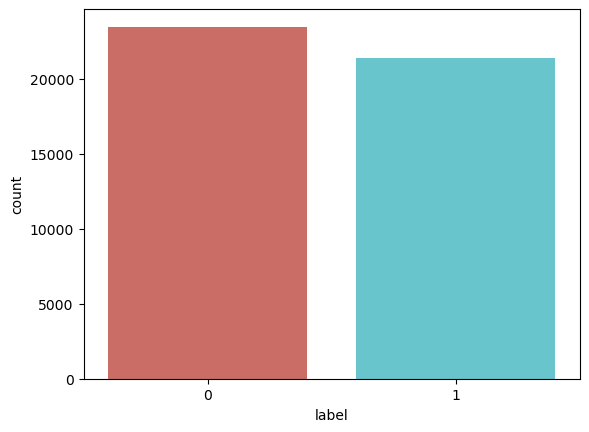

In [8]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

create_distribution(news_df)

### WordCloud Visuals

The wordcloud gives visual details of what the text data looks like for real and fake news.
The words that occurs most frequently are displayed in larger font and words that occur less frequently are in smaller font.

In [9]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in news_df[news_df['label']==1].text: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in news_df[news_df['label']==0].text: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

###### Wordcloud for real news

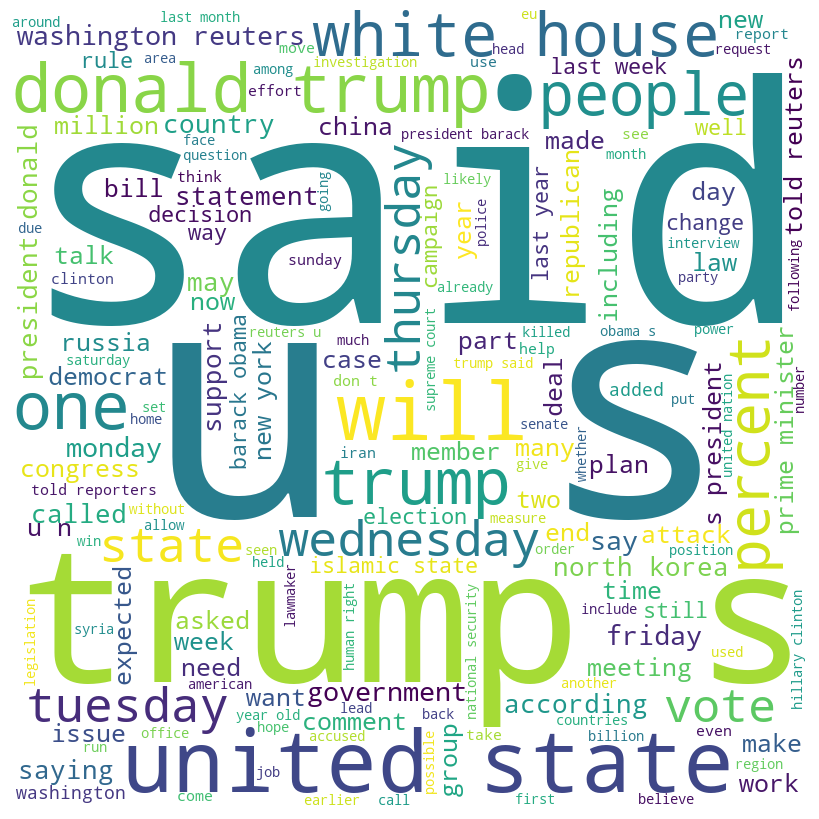

In [10]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

###### Wordcloud for fake news

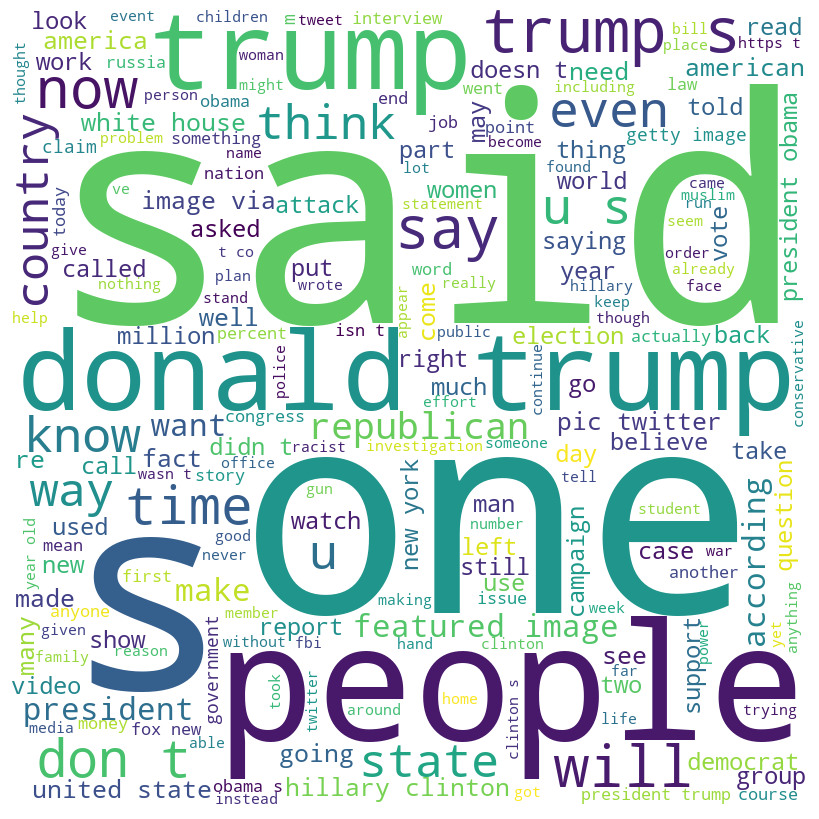

In [11]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Cleaning & Preprocessing of Text Data

In [12]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk

In [13]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
news_df['text'][2011]

'This HUGE arrest by the FBI is proof that we need to end the food stamp program as it is now. The fraud is so rampant that even illegals are making millions off of the program and off of the backs of the American taxpayer. We ve reported on way too many immigrants who have robbed the American people by doing the same thing these 22 latinos did. One particular case is of a woman who robbed us all blind of $3.6 million with her food stamp fraud:IMMIGRANT Ghanaian Woman Pleads Guilty To $3.6 Million in Food Stamp Fraud Media Ignores Her Immigrant StatusYET ANOTHER CASE:ALABAMA FRAUD: FOOD STAMPS TO CASH SENT TO YEMENHopefully, you get the picture legal AND illegal immigrants are coming to America to rob you blind! The bust from Operation Stampede/Cash Hungry in Florida involved more than $13 million in fraudulent food-stamp transactions and could be the largest food stamp bust in the nation s history. The Palm Beach County Sheriff s Office, state and federal law enforcement conducted a j

In [18]:
lemmatizer = WordNetLemmatizer()
for x in range(len(news_df)) :
    corpus = []
    review = news_df['text'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = re.sub('\[.*?\]', '', review)
    review = re.sub("\\W"," ", review) 
    review = re.sub('https?://\S+|www\.\S+', '', review)
    review = re.sub('<.*?>+', '', review)
    review = re.sub('\n', '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stop_words :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    news_df['text'][x] = review

C:\Users\owner\AppData\Local\Temp\ipykernel_3208\2594387820.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['text'][x] = review


In [19]:
news_df['text'][2011]

'huge arrest fbi proof need end food stamp program fraud rampant even illegals making million program back american taxpayer reported way many immigrant robbed american people thing latino one particular case woman robbed u blind million food stamp fraudimmigrant ghanaian woman pleads guilty million food stamp fraud medium ignores immigrant statusyet another casealabama fraud food stamp cash sent yemenhopefully get picture legal illegal immigrant coming america rob blind bust operation stampedecash hungry florida involved million fraudulent foodstamp transaction could largest food stamp bust nation history palm beach county sheriff office state federal law enforcement conducted joint identity theft investigation involving obtaining snap ebt card stolen identity according sheriff office fraudulently obtained ebt card taken opa locka flea market snapfood stamp ebt benefit allocated exchanged cash twenty two people charged crimesopalocka fruit produce market sell fruit vegetablesinstead o

### Applying NLP Techniques

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
X = news_df['text']
Y = news_df['label']

In [22]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X)
freq_term_matrix = count_vectorizer.transform(X)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)
tf_idf_matrix

<44898x203312 sparse matrix of type '<class 'numpy.float64'>'
	with 7041207 stored elements in Compressed Sparse Row format>

In [23]:
tf_idf_matrix.shape

(44898, 203312)

### Modelling

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y, test_size=0.3, random_state=0)

In [25]:
X_train.shape, X_test.shape

((31428, 203312), (13470, 203312))

### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn import metrics
import itertools

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [30]:
LR = LogisticRegression(C=1e5, max_iter=300)
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
print('Accuracy of logistic classifier on training set: {:.2f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic classifier on test set: {:.2f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic classifier on training set: 1.00
Accuracy of logistic classifier on test set: 0.99


In [31]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7017
           1       0.99      0.99      0.99      6453

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Accuracy: 99.41%
Confusion matrix, without normalization


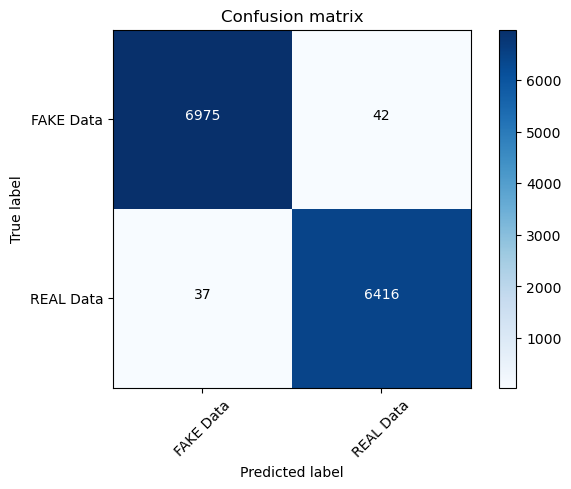

In [32]:
score = metrics.accuracy_score(y_test, LR_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, LR_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Using a validation set to evaluate the LR model

In [33]:
LR_val = LogisticRegression(C=1e5, max_iter=300)
Xt, Xv, Yt, Yv = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [34]:
LR_val.fit(Xt, Yt)
val_pred = LR_val.predict(Xv)
print('Accuracy of logistic classifier on validation train set: {:.2f}'.format(LR_val.score(Xt, Yt)))
print('Accuracy of logistic classifier on validation test set: {:.2f}'.format(LR_val.score(Xv, Yv)))

Accuracy of logistic classifier on validation train set: 1.00
Accuracy of logistic classifier on validation test set: 0.99


In [35]:
print(classification_report(Yv, val_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4947
           1       0.99      0.99      0.99      4482

    accuracy                           0.99      9429
   macro avg       0.99      0.99      0.99      9429
weighted avg       0.99      0.99      0.99      9429



Accuracy: 99.24%
Confusion matrix, without normalization


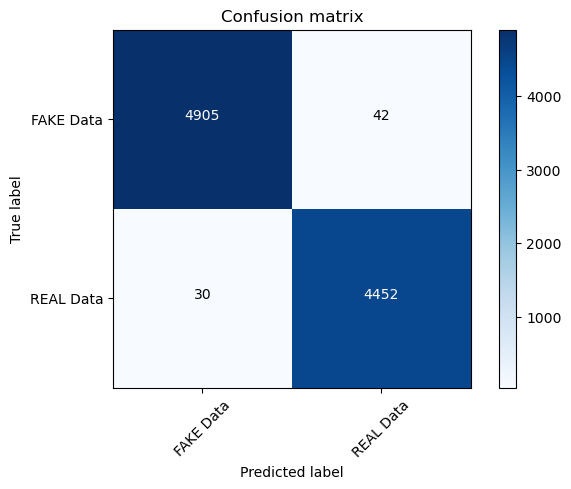

In [36]:
score = metrics.accuracy_score(Yv, val_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Yv, val_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Passive Aggressive Classifier

In [37]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [38]:
PA = PassiveAggressiveClassifier()
PA.fit(X_train,y_train)
PA_pred = PA.predict(X_test)
print('Accuracy of PAC on training set: {:.2f}'.format(PA.score(X_train, y_train)))
print('Accuracy of PAC on test set: {:.2f}'.format(PA.score(X_test, y_test)))

Accuracy of PAC on training set: 1.00
Accuracy of PAC on test set: 0.99


In [39]:
print(classification_report(y_test, PA_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7017
           1       0.99      0.99      0.99      6453

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Accuracy: 99.42%
Confusion matrix, without normalization


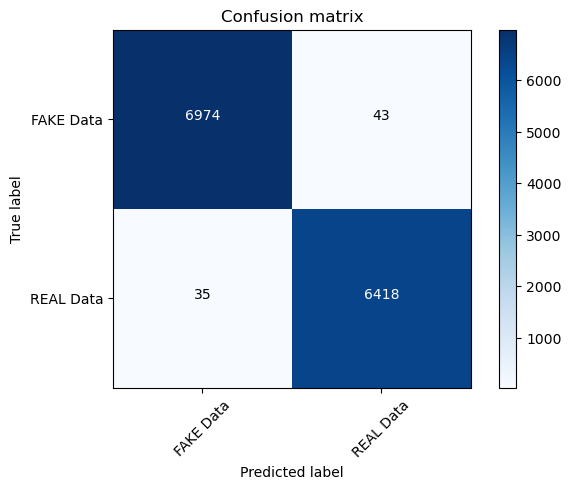

In [40]:
score = metrics.accuracy_score(y_test, PA_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, PA_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Using Cross validation to evaluate the Model

In [43]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [44]:
model = LogisticRegression(C=1e5, max_iter=300)
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

In [45]:
accuracies

array([0.99427299, 0.99522749, 0.99522749, 0.99315831, 0.99331742])

In [46]:
np.mean(accuracies)

0.9942407405579343

### Deployment Pipeline

In [54]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
#Re-assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X = news_df['text']
Y = news_df['label']

In [56]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5, max_iter=300)),
])

In [57]:
pipeline.fit(X, Y)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, max_iter=300))])

In [58]:
pipeline.predict(["No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to as  Hannibal.  He has already received death threats as a result of interrupting #FYF911 conference calls.An unidentified black man said  when those mother f**kers are by themselves, that s when when we should start f***ing them up. Like they do us, when a bunch of them ni**ers takin  one of us out, that s how we should roll up.  He said,  Cause we already roll up in gangs anyway. There should be six or seven black mother f**ckers, see that white person, and then lynch their ass. Let s turn the tables. They conspired that if  cops started losing people,  then  there will be a state of emergency. He speculated that one of two things would happen,  a big-ass [R s?????] war,  or  ni**ers, they are going to start backin  up. We are already getting killed out here so what the f**k we got to lose? Sunshine could be heard saying,  Yep, that s true. That s so f**king true. He said,  We need to turn the tables on them. Our kids are getting shot out here. Somebody needs to become a sacrifice on their side.He said,  Everybody ain t down for that s**t, or whatever, but like I say, everybody has a different position of war.  He continued,  Because they don t give a f**k anyway.  He said again,  We might as well utilized them for that s**t and turn the tables on these n**ers. He said, that way  we can start lookin  like we ain t havin  that many casualties, and there can be more causalities on their side instead of ours. They are out their killing black people, black lives don t matter, that s what those mother f**kers   so we got to make it matter to them. Find a mother f**ker that is alone. Snap his ass, and then f***in hang him from a damn tree. Take a picture of it and then send it to the mother f**kers. We  just need one example,  and  then people will start watchin .  This will turn the tables on s**t, he said. He said this will start  a trickle-down effect.  He said that when one white person is hung and then they are just  flat-hanging,  that will start the  trickle-down effect.  He continued,  Black people are good at starting trends. He said that was how  to get the upper-hand. Another black man spoke up saying they needed to kill  cops that are killing us. The first black male said,  That will be the best method right there. Breitbart Texas previously reported how Sunshine was upset when  racist white people  infiltrated and disrupted one of her conference calls. She subsequently released the phone number of one of the infiltrators. The veteran immediately started receiving threatening calls.One of the #F***YoFlag movement supporters allegedly told a veteran who infiltrated their publicly posted conference call,  We are going to rape and gut your pregnant wife, and your f***ing piece of sh*t unborn creature will be hung from a tree. Breitbart Texas previously encountered Sunshine at a Sandra Bland protest at the Waller County Jail in Texas, where she said all white people should be killed. She told journalists and photographers,  You see this nappy-ass hair on my head?   That means I am one of those more militant Negroes.  She said she was at the protest because  these redneck mother-f**kers murdered Sandra Bland because she had nappy hair like me. #FYF911 black radicals say they will be holding the  imperial powers  that are actually responsible for the terrorist attacks on September 11th accountable on that day, as reported by Breitbart Texas. There are several websites and Twitter handles for the movement. Palmetto Star  describes himself as one of the head organizers. He said in a YouTube video that supporters will be burning their symbols of  the illusion of their superiority,  their  false white supremacy,  like the American flag, the British flag, police uniforms, and Ku Klux Klan hoods.Sierra McGrone or  Nocturnus Libertus  posted,  you too can help a young Afrikan clean their a** with the rag of oppression.  She posted two photos, one that appears to be herself, and a photo of a black man, wiping their naked butts with the American flag.For entire story: Breitbart News"])

array([1], dtype=int64)

In [59]:
pipeline.predict(["A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an â€œevangelical Catholic.â€ Over two hours, Jindal, 42, recalled talking with a girl in high school who wanted to â€œsave my soul,â€ reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.â€œI was struck, and struck hard,â€ Jindal told the pastors. â€œThis was the Son of God, and He had died for our sins.â€ Jindalâ€™s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to find a political base that could help propel him into the top tier of Republican candidates seeking to run for the White House in 2016. Known in GOP circles mostly for his mastery of policy issues such as health care, Jindal, a Rhodes Scholar and graduate of the Ivy Leagueâ€™s Brown University, does not have an obvious pool of activist supporters to help drive excitement outside his home state. So he is harnessing his religious experience in a way that has begun to appeal to parts of the GOPâ€™s influential core of religious conservatives, many of whom have yet to find a favorite among the Republicans eyeing the presidential race. Other potential 2016 GOP candidates are wooing the evangelical base, including Sens. Rand Paul (Ky.) and Ted Cruz (Tex.) and Indiana Gov. Mike Pence. But over the weekend in Lynchburg â€” a mecca of sorts for evangelicals as the home of Liberty University, founded in the 1970s by the Rev. Jerry Falwell â€” Jindal appeared to make progress. In addition to his dinner"])

array([0], dtype=int64)

In [60]:
pipeline.predict(["NEW YORK/WASHINGTON (Reuters) - The new U.S. tax code targets high-tax states and may be unconstitutional, New York Governor Andrew Cuomo said on Thursday, saying that the bill may violate New York residentsâ€™ rights to due process and equal protection.  The sweeping Republican tax bill signed into law by U.S. President Donald Trump on Friday introduces a cap, of $10,000,  on deductions of state and local income and property taxes, known as SALT. The tax overhaul was the partyâ€™s first major legislative victory since Trump took office in January.  The SALT provision will hit many taxpayers in states with high incomes, high property values and high taxes, like New York, New Jersey and California. Those states are generally Democratic leaning.  â€œIâ€™m not even sure what they did is legally constitutional and thatâ€™s something weâ€™re looking at now,â€ Cuomo said in an interview with CNN. In an interview with CNBC, Cuomo suggested why the bill may be unconstitutional.  â€œPolitics does not trump the law,â€ Cuomo said on CNBC. â€œYou have the constitution, you have the law, you have due process, you have equal protection. You canâ€™t use politics just because the majority controls to override the law.â€ The Fifth Amendment of the Constitution, better known for its protection against self-incrimination, also protects individuals from seizure of life, liberty or property without due process and has been interpreted by the Supreme Court as guaranteeing equal protection by the law.  Cuomo and California Governor Jerry Brown, both Democrats, have previously said they were exploring legal challenges to SALT deduction limits.  Law professors have said legal challenges would likely rest on arguing that the provision interferes with the protection of statesâ€™ rights under the U.S. Constitutionâ€™s 10th Amendment. Tax attorneys said Cuomoâ€™s legal argument against the tax bill could be that it discriminates and places an unjust tax burden on states that heavily voted for Democrats in the past - known as â€œblue states.â€ â€œThe de facto effect of this legislation is to discriminate against blue states and particularly from (Cuomoâ€™s) perspective the state of New York,â€ said Joseph Callahan, an attorney with the law firm Mackay, Caswell & Callahan in New York.  But some tax experts noted the U.S. Supreme Court has interpreted the 16th Amendment to give Congress broad latitude to tax as it sees fit. In a frequently cited 1934 decision, the Supreme Court called tax deductions a â€œlegislative graceâ€ rather than a vested right. â€œI donâ€™t understand how they think they have a valid lawsuit here,â€ David Gamage, a professor of tax law at Indiana Universityâ€™s Maurer School of Law, told Reuters last week, speaking generally about governors in blue states that could challenge the tax bill.  Cuomo also said on Thursday that New York is proposing a restructuring of its tax code. He provided no details.  A group of 13 law professors on Dec. 18 published a paper suggesting ways that high-tax states could minimize the effects of the SALT deduction cap.  Their suggestions included shifting more of the tax burden onto businesses in the form of higher employer-side payroll taxes, since the federal tax billâ€™s cap on SALT deductions only applies to individuals and not businesses. States also could raise taxes on pass-through entities, which the federal tax bill specifically benefits with a lower rate on a portion of their income. On Friday, Cuomo said he would allow state residents to make a partial or full pre-payment on their property tax bill before Jan. 1, allowing taxpapyers to deduct such payments for 2017 before the cap kicks in, prompting a wave of residents to pay early.  However, the U.S. Internal Revenue Service on Wednesday advised homeowners that the pre-payment of 2018 property taxes may not be deductible."])

array([1], dtype=int64)

In [61]:
#saving the pipeline
filename = 'news_pipeline.sav'
joblib.dump(pipeline, filename)
filename

'news_pipeline.sav'

### Conclusion
The logistic classifier results in '99.4%' accuracy score as well as the passive aggressive classifier performing favorably on the data with optimum test accuracy'

The validation set used to evaluate the logistic regression model has an accuracy score of '99'2%', these values demonstrate that the model is making accurate predictions majorly and is good to go.

### Prediction

In [63]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["Health care reform legislation is likely to mandate free sex change surgeries."])
print(result)

[0]
